In [4]:
# Import data analysis modules
import numpy as np
import pandas as pd
# Import visualization modules
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

plt.ion() # inline matplotlib graphics
# pd.options.plotting.backend = 'plotly'

In [5]:
# Use pandas to read in csv file of the titanic dataset
train = pd.read_csv('data/train.csv')
# test = pd.read_csv('data/test.csv')
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

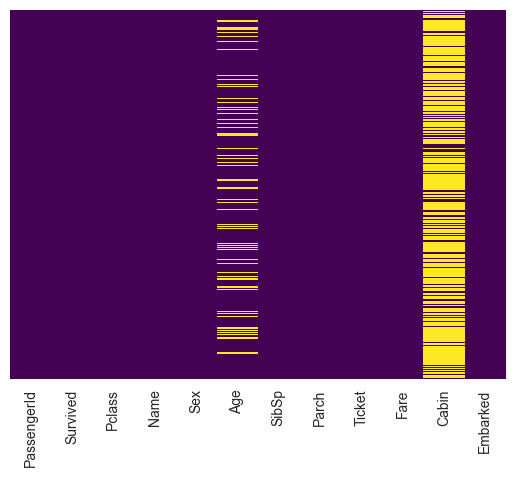

In [7]:
# Use the .isnull() method to locate missing data
missing_values = train.isnull()

# Use seaborn to conduct heatmap to identify missing data
# data -> argument refers to the data to creat heatmap
# yticklabels -> argument avoids plotting the column names
# cbar -> argument identifies if a colorbar is required or not
# cmap -> argument identifies the color of the heatmap
sns.heatmap(data = missing_values, yticklabels=False, cbar=False, cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

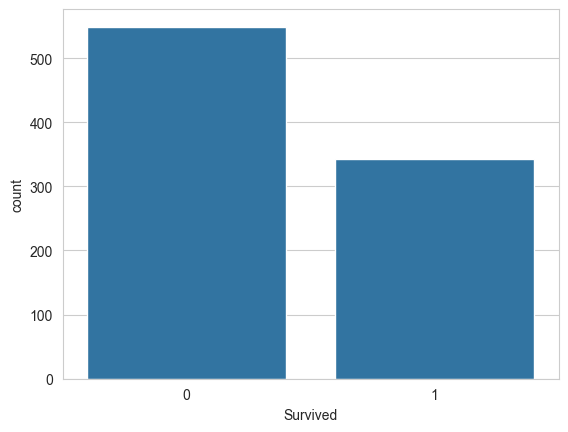

In [8]:
# Survivors ratio
sns.countplot(x='Survived', data=train)

<Axes: xlabel='Survived', ylabel='count'>

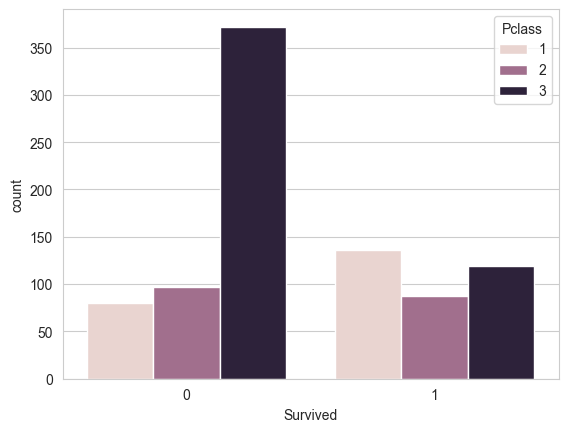

In [9]:
# Use the countplot() method to identify ratio of who survived vs. not with interest in Passenger class
# x -> argument referes to column of interest
# data -> argument refers to dataset
# hue -> allows another level to subdivide data
# palette -> argument refers to plot color
sns.countplot(x='Survived', data=train, hue='Pclass')

<Axes: xlabel='Pclass', ylabel='Age'>

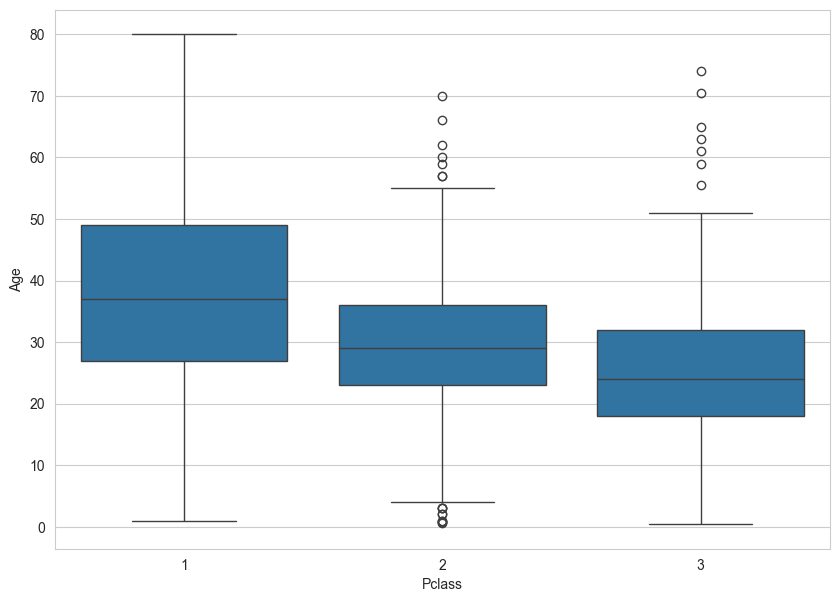

In [10]:
# Identify outliers
# train.plot(kind="box")
plt.figure(figsize=(10, 7))
sns.boxplot(x='Pclass', y='Age', data=train)

C:\Users\office27\AppData\Local\Temp\ipykernel_19220\217213297.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\office27\AppData\Local\Temp\ipykernel_19220\217213297.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

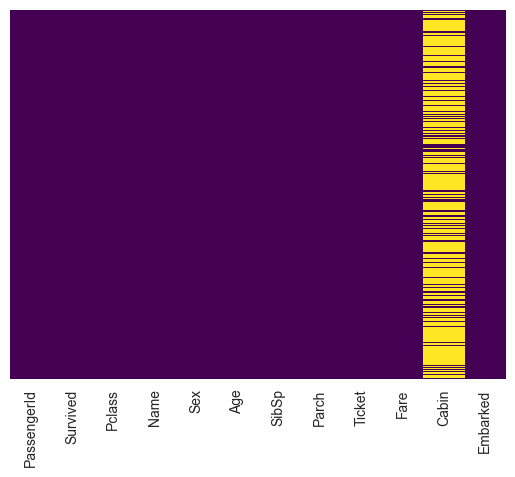

In [11]:
# Create function to impute the age value if it is null
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
# Apply function to impute the age for missing values
# The age column is at position 0
# The pclass column is at position 1
# axis -> argument refers to columns instead of rows to apply the impute_age function
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)
# test['Age'] = test[['Age', 'Pclass']].apply(impute_age, axis=1)
sns.heatmap(data = train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Text(0.5, 1.0, 'Train Set')

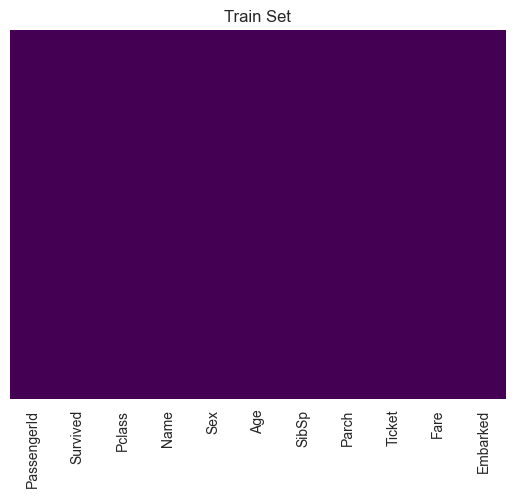

In [12]:
# Remove column 'Cabin' from dataframe, because it contains too many null values
train.drop(columns='Cabin', inplace=True)
# Remove lines containing null values
train.dropna(inplace=True)
train.head(20)
sns.heatmap(data = train.isnull(), yticklabels=False, cbar=False, cmap='viridis').set_title("Train Set")

# # Remove column 'Cabin' from dataframe, because it contains too many null values
# test.drop(columns='Cabin', inplace=True)
# # Remove lines containing null values
# test.dropna(inplace=True)
# sns.heatmap(data = test.isnull(), yticklabels=False, cbar=False, cmap='viridis').set_title("Test Set")

In [13]:
print(train['Sex'].unique())
print(train['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [14]:
# Use the .get_dummies() method to convert categorical data into dummy values
# train['Sex'] refers to the column we want to convert
# drop_first -> argument avoids the multicollinearity problem, which can undermines
# the statistical significance of an independent variable.
sex = pd.get_dummies(train['Sex'], drop_first=True)
# sex_test = pd.get_dummies(test['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)
# embark_test = pd.get_dummies(test['Embarked'], drop_first=True)
# Use  .concat() method to merge the series data into one dataframe
train = pd.concat([train, sex, embark], axis=1)
# test = pd.concat([test, sex_test, embark_test], axis=1)
train.head(20)
# test.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q,True,True,False
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,True,False,True
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,True,False,True
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,False,False,True
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,False,False,False


In [15]:
# Drop columns with categorical data
train.drop(['Sex','Embarked','Ticket','Name','PassengerId'], axis=1, inplace=True)
train.head(20)
# test.drop(['Sex','Embarked','Ticket','Name','PassengerId'], axis=1, inplace=True)
# test.head(20)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True
5,0,3,24.0,0,0,8.4583,True,True,False
6,0,1,54.0,0,0,51.8625,True,False,True
7,0,3,2.0,3,1,21.0750,True,False,True
8,1,3,27.0,0,2,11.1333,False,False,True
9,1,2,14.0,1,0,30.0708,False,False,False


In [16]:
# Split data into 'x' features and 'y' target label sets (if survived)
x = train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']]
y = train['Survived']
# x_test = test[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [17]:
# Create instance of LogisticRegression and fit the model using the training data
logmodel = LogisticRegression(max_iter = 1000)
logmodel.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [18]:
y_predict = logmodel.predict(x_test)
x_test_series = x_test.iloc[:,0]
predict = pd.concat([x_test, pd.DataFrame({'Y Predicted': y_predict, 'Y Real': y_test})], axis=1)
predict.head(50)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Y Predicted,Y Real
529,2,23.0,2,1,11.5000,True,False,True,0,0
491,3,21.0,0,0,7.2500,True,False,True,0,0
249,2,54.0,1,0,26.0000,True,False,True,0,0
607,1,27.0,0,0,30.5000,True,False,True,0,1
175,3,18.0,1,1,7.8542,True,False,True,0,0
99,2,34.0,1,0,26.0000,True,False,True,0,0
885,3,39.0,0,5,29.1250,False,True,False,0,0
105,3,28.0,0,0,7.8958,True,False,True,0,0
616,3,34.0,1,1,14.4000,True,False,True,0,0
840,3,20.0,0,0,7.9250,True,False,True,0,0


In [19]:
# Print evaluation statistics
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.84      0.89      0.87       163
           1       0.81      0.74      0.77       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267

